Predicting House price based on the size of the house using Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('homeprices.csv')

In [3]:
df.shape

(5, 2)

In [4]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


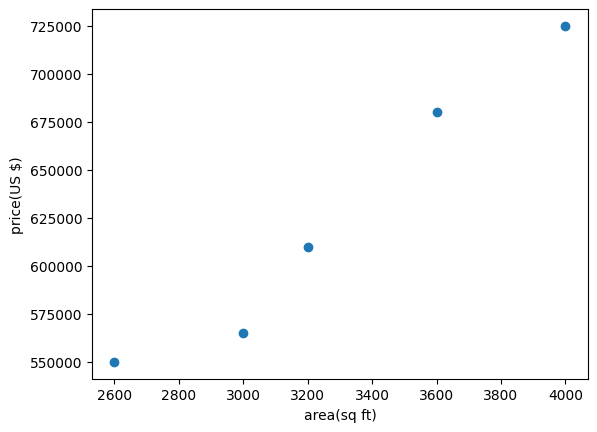

In [6]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)

In [7]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-1,1,5,10,20,30,40,50,60,80,100]}
reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
reg.fit(df[['area']],df.price)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+08, tolerance: 1.525e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+08, tolerance: 1.782e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+08, tolerance: 2.215e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 60, 80, 100]},
             scoring='neg_mean_squared_error')

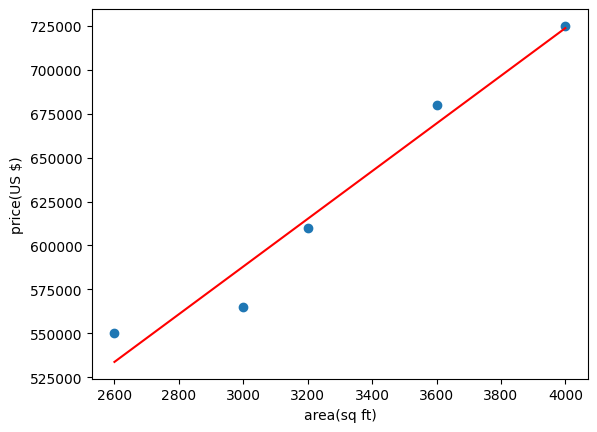

In [8]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]),color='red')

In [9]:
print(reg.best_params_)

{'alpha': 100}


In [10]:
reg.best_score_

-578049398.283705

In [11]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([628715.74486301])

In [12]:
d=pd.read_csv("areas.csv")
p=reg.predict(d)
d['prices']=p
d.to_csv('predictions.csv',index=False)